### DATA PREPROCESSING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv('D:\Jupyter\jupyter\Datasets\my_file (1).csv')

<>:1: SyntaxWarning: invalid escape sequence '\J'
<>:1: SyntaxWarning: invalid escape sequence '\J'
C:\Users\acer\AppData\Local\Temp\ipykernel_1092\3963187982.py:1: SyntaxWarning: invalid escape sequence '\J'
  df=pd.read_csv('D:\Jupyter\jupyter\Datasets\my_file (1).csv')


In [5]:
df.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [6]:
df.sample(7)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
12,13,NaN,NaN,"$204,000,000","$251,856,802",Katy Perry,Prismatic World Tour,2014–2015,151,"$1,350,993",[19]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]
17,18,NaN,NaN,"$169,800,000","$207,046,755",Madonna,Rebel Heart Tour,2015–2016,82,"$2,070,732",[4]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
14,15,2[c],NaN,"$194,000,000","$281,617,035",Madonna,Confessions Tour,2006,60,"$3,233,333",[5]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]


In [7]:
df.describe()

,Rank,Shows
count,20.000000,20.000000
mean,10.450000,110.000000
std,5.942488,66.507617
min,1.000000,41.000000
25%,5.750000,59.000000
50%,10.500000,87.000000
75%,15.250000,134.500000
max,20.000000,325.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_copy=df

In [11]:
df.isna().sum()

Rank                                 0
Peak                                11
All Time Peak                       14
Actual gross                         0
Adjusted gross (in 2022 dollars)     0
Artist                               0
Tour title                           0
Year(s)                              0
Shows                                0
Average gross                        0
Ref.                                 0
dtype: int64

In [12]:
df.shape

(20, 11)

In [13]:
df.isnull().mean()*100

Rank                                 0.0
Peak                                55.0
All Time Peak                       70.0
Actual gross                         0.0
Adjusted gross (in 2022 dollars)     0.0
Artist                               0.0
Tour title                           0.0
Year(s)                              0.0
Shows                                0.0
Average gross                        0.0
Ref.                                 0.0
dtype: float64

In [14]:
df.drop(columns=['All Time Peak'],inplace=True)

In [15]:
df.head()

,Rank,Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [16]:
df['Peak'].unique()
df[df['Peak'].isnull()]


,Rank,Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
7,7,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]
10,11,NaN,"$229,100,000[b]","$283,202,896",Beyoncé,The Mrs. Carter Show World Tour,2013–2014,132,"$1,735,606",[15][16]
11,12,NaN,"$227,400,000","$295,301,479",Lady Gaga,The Monster Ball Tour *,2009–2011,203,"$1,118,227",[18]
12,13,NaN,"$204,000,000","$251,856,802",Katy Perry,Prismatic World Tour,2014–2015,151,"$1,350,993",[19]
15,16,NaN,"$184,000,000","$227,452,347",Pink,The Truth About Love Tour,2013–2014,142,"$1,295,775",[22]
16,17,NaN,"$170,000,000","$213,568,571",Lady Gaga,Born This Way Ball,2012–2013,98,"$1,734,694",[d]
17,18,NaN,"$169,800,000","$207,046,755",Madonna,Rebel Heart Tour,2015–2016,82,"$2,070,732",[4]
18,19,NaN,"$167,700,000[e]","$204,486,106",Adele,Adele Live 2016,2016–2017,121,"$1,385,950",[25]


In [17]:
df.columns = df.columns.str.strip()


In [18]:
df.columns

Index(['Rank', 'Peak', 'Actual gross', 'Adjusted gross (in 2022 dollars)',
       'Artist', 'Tour title', 'Year(s)', 'Shows', 'Average gross', 'Ref.'],
      dtype='object')

In [19]:
df['Actual\xa0gross'].unique() ##\xa0 is a special unicode space character 

array(['$780,000,000', '$579,800,000', '$411,000,000', '$397,300,000',
       '$345,675,146', '$305,158,363', '$280,000,000', '$257,600,000',
       '$256,084,556', '$250,400,000', '$229,100,000[b]', '$227,400,000',
       '$204,000,000', '$200,000,000', '$194,000,000', '$184,000,000',
       '$170,000,000', '$169,800,000', '$167,700,000[e]', '$150,000,000'],
      dtype=object)

In [20]:
# df['Actual\xa0gross']=df['Actual\xa0gross'].str.strip('[').str[0]
df["Actual\xa0gross"] = df["Actual\xa0gross"].str.split("[").str[0].str.split('$').str[1]

df['Actual\xa0gross'].unique()
df['Actual\xa0gross']=df['Actual\xa0gross'].str.replace(',','')

df['Actual\xa0gross']=df['Actual\xa0gross'].astype(int)


In [21]:
df['Peak'] = df["Peak"].str.split("[").str[0]

df['Peak'].unique()
# df['Peak']=df['Peak'].str.replace(',','')

df['Peak']= pd.to_numeric(df["Peak"], errors="coerce").fillna(0).astype(int) 

In [22]:
df['Peak'].value_counts()
df.drop(columns='Peak',inplace=True)

In [23]:
df['Adjusted\xa0gross (in 2022 dollars)']=df['Adjusted\xa0gross (in 2022 dollars)'].str.replace(',','')
df['Adjusted\xa0gross (in 2022 dollars)']=df['Adjusted\xa0gross (in 2022 dollars)'].str.split('$').str[1]

In [24]:
df['Adjusted\xa0gross (in 2022 dollars)']=df['Adjusted\xa0gross (in 2022 dollars)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Actual gross                      20 non-null     int64 
 2   Adjusted gross (in 2022 dollars)  20 non-null     int64 
 3   Artist                            20 non-null     object
 4   Tour title                        20 non-null     object
 5   Year(s)                           20 non-null     object
 6   Shows                             20 non-null     int64 
 7   Average gross                     20 non-null     object
 8   Ref.                              20 non-null     object
dtypes: int64(4), object(5)
memory usage: 1.5+ KB


In [25]:
df.drop(columns='Ref.',inplace=True)
# df['Average gross']=df['Average gross'].str.replace(',','')

# df['Average gross']=df['Average gross'].str.split('$').str[1]


In [26]:
df['Average gross'].unique()

array(['$13,928,571', '$10,353,571', '$4,835,294', '$2,546,795',
       '$6,522,173', '$3,467,709', '$2,137,405', '$6,282,927',
       '$5,226,215', '$2,945,882', '$1,735,606', '$1,118,227',
       '$1,350,993', '$615,385', '$3,233,333', '$1,295,775', '$1,734,694',
       '$2,070,732', '$1,385,950', '$1,744,186'], dtype=object)

In [27]:
df['Average gross']=df['Average gross'].str.replace(',','')

In [28]:
df['Average gross']=df['Average gross'].str.split('$').str[1]

In [29]:
df['Average gross']=df['Average gross'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Actual gross                      20 non-null     int64 
 2   Adjusted gross (in 2022 dollars)  20 non-null     int64 
 3   Artist                            20 non-null     object
 4   Tour title                        20 non-null     object
 5   Year(s)                           20 non-null     object
 6   Shows                             20 non-null     int64 
 7   Average gross                     20 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.4+ KB


In [31]:
df.shape

(20, 8)

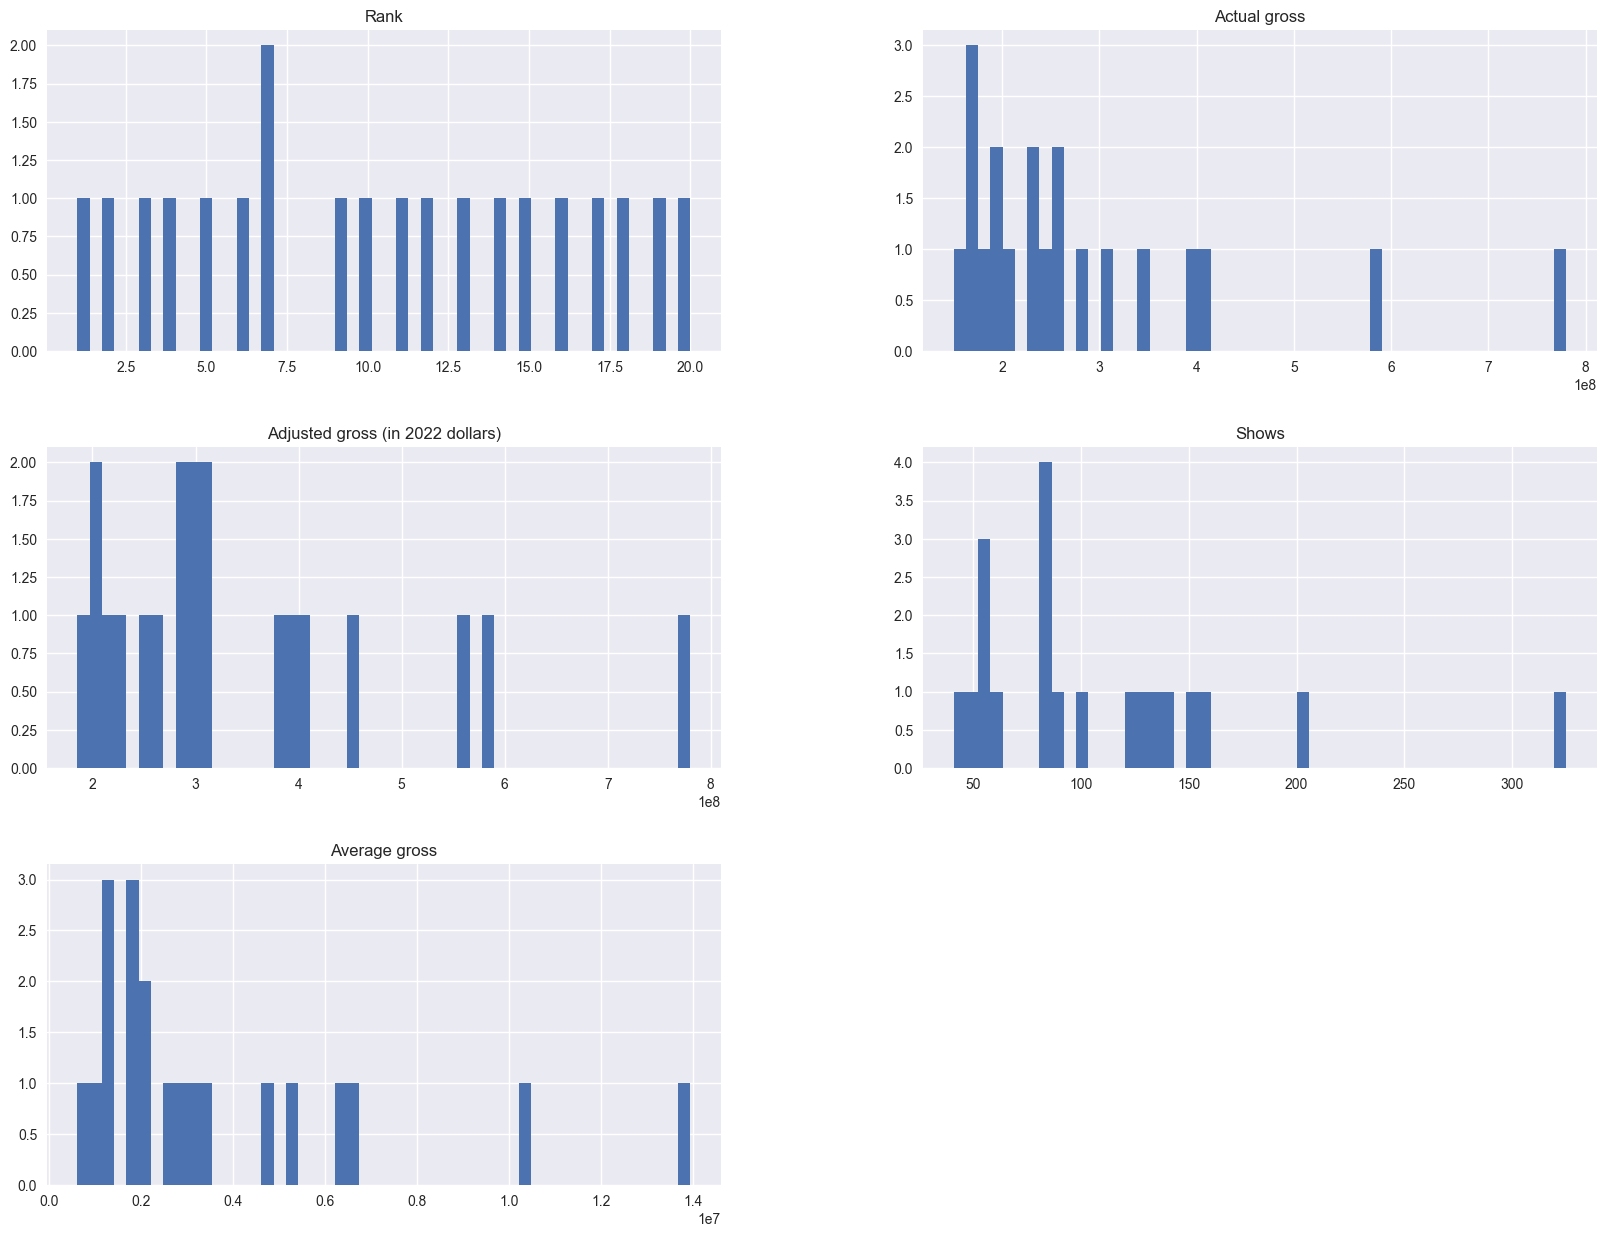

In [32]:
plt.style.use('seaborn-v0_8')

df.hist(bins=50,figsize=(20,15))
plt.show()

In [33]:
df.describe()


,Rank,Actual gross,Adjusted gross (in 2022 dollars),Shows,Average gross
count,20.000000,2.000000e+01,2.000000e+01,20.000000,2.000000e+01
mean,10.450000,2.879509e+08,3.438781e+08,110.000000,3.726571e+06
std,5.942488,1.563284e+08,1.514627e+08,66.507617,3.393340e+06
min,1.000000,1.500000e+08,1.854231e+08,41.000000,6.153850e+05
25%,5.750000,1.915000e+08,2.457557e+08,59.000000,1.647508e+06
50%,10.500000,2.397500e+08,2.974889e+08,87.000000,2.342100e+06
75%,15.250000,3.152876e+08,3.924451e+08,134.500000,4.933024e+06
max,20.000000,7.800000e+08,7.800000e+08,325.000000,1.392857e+07


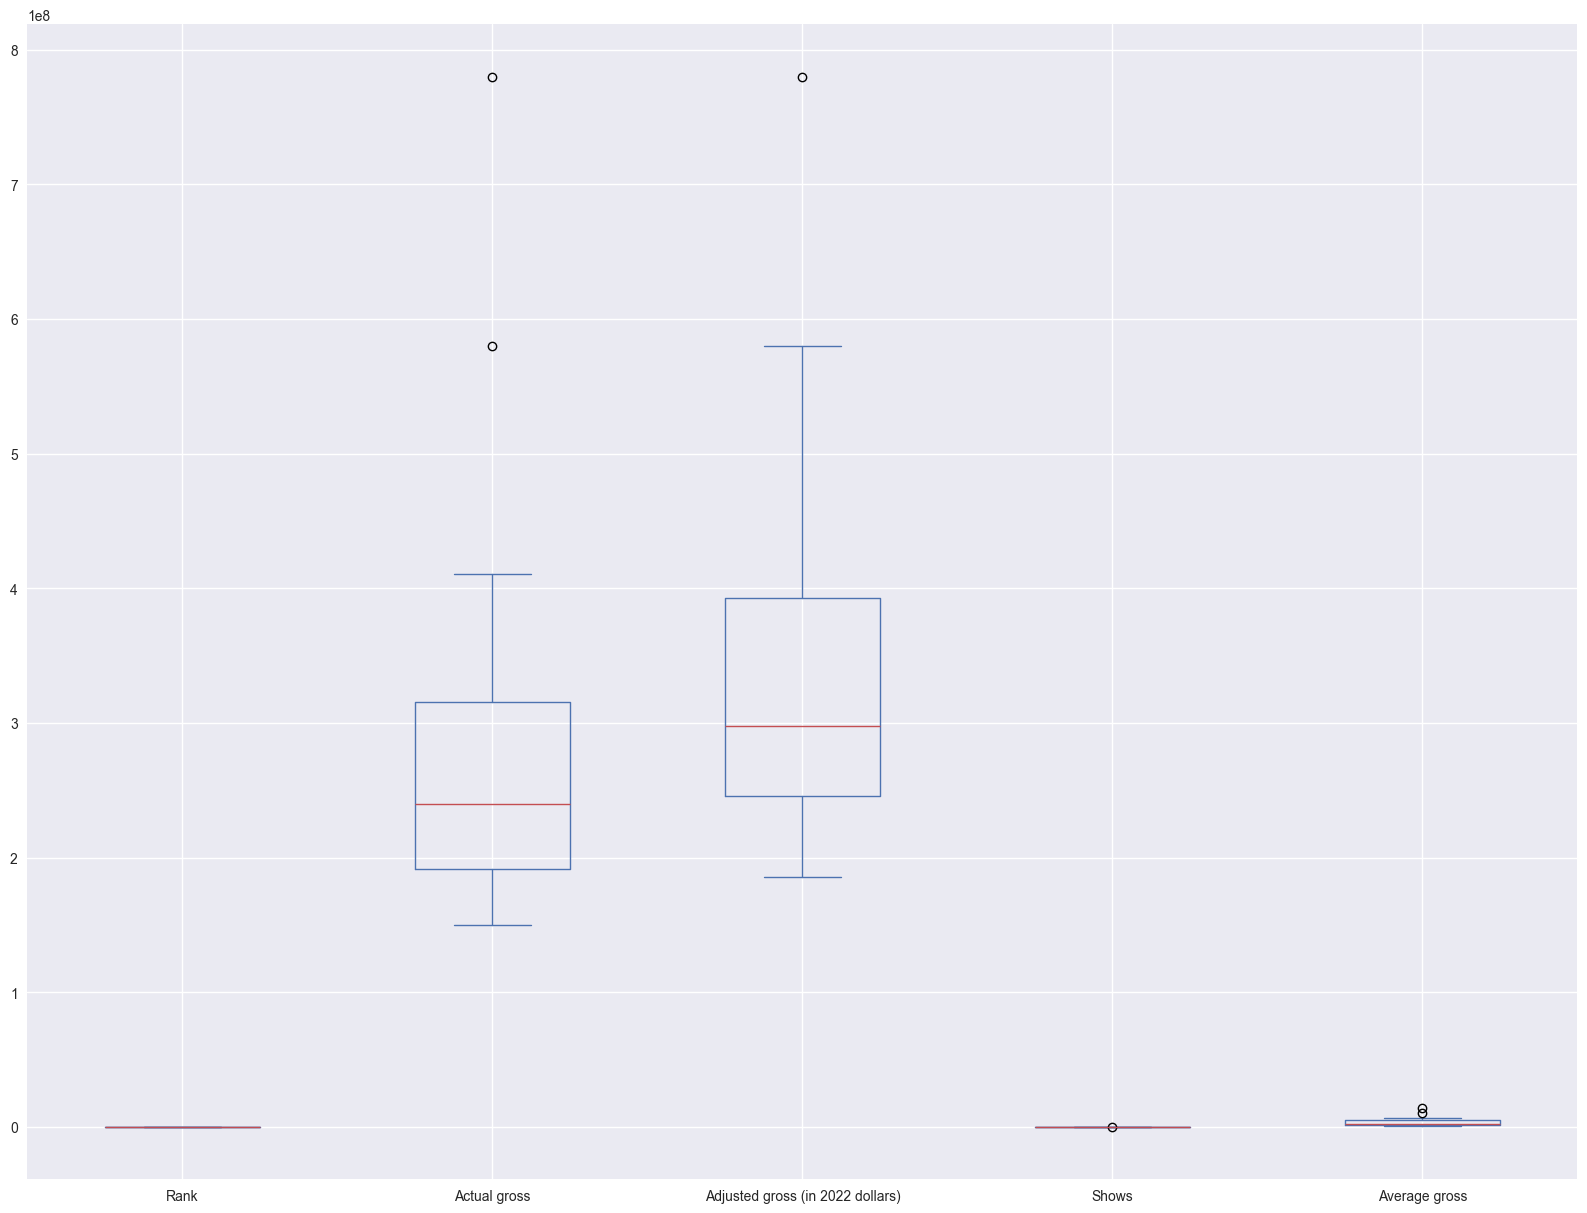

In [34]:
plt.style.use('seaborn-v0_8')
df.plot(kind="box",figsize=(20,15))
plt.show()

In [35]:
df['Year(s)'].unique()

array(['2023–2024', '2023', '2008–2009', '2018–2019', '2018', '2012',
       '2016', '2015', '2013–2014', '2009–2011', '2014–2015', '2002–2005',
       '2006', '2012–2013', '2015–2016', '2016–2017'], dtype=object)

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_model = df.drop(columns=['Tour title'])
preprocessor = ColumnTransformer(
    transformers=[('artist_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Artist'])],
    remainder='passthrough'
)

encoded_array = preprocessor.fit_transform(df_model)
encoded_feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=df_model.index)
df_encoded.head()

,artist_ohe__Artist_Adele,artist_ohe__Artist_Beyoncé,artist_ohe__Artist_Celine Dion,artist_ohe__Artist_Cher,artist_ohe__Artist_Katy Perry,artist_ohe__Artist_Lady Gaga,artist_ohe__Artist_Madonna,artist_ohe__Artist_Pink,artist_ohe__Artist_Taylor Swift,remainder__Rank,remainder__Actual gross,remainder__Adjusted gross (in 2022 dollars),remainder__Year(s),remainder__Shows,remainder__Average gross
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,780000000,780000000,2023–2024,56,13928571
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,579800000,579800000,2023,56,10353571
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,411000000,560622615,2008–2009,85,4835294
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,397300000,454751555,2018–2019,156,2546795
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,345675146,402844849,2018,53,6522173


In [38]:
df_encoded['remainder__Year(s)'] = df_encoded['remainder__Year(s)'].str.replace("–", "-")

df_encoded[["Start_Year", "End_Year"]] = df_encoded['remainder__Year(s)'].str.split("-", expand=True)

df_encoded["End_Year"] = df_encoded["End_Year"].fillna(df_encoded["Start_Year"])

df_encoded["Start_Year"] = df_encoded["Start_Year"].astype(int)
df_encoded["End_Year"] = df_encoded["End_Year"].astype(int)

df_encoded["Tour_Duration"] = df_encoded["End_Year"] - df_encoded["Start_Year"] + 1


In [39]:
df_encoded.head()

,artist_ohe__Artist_Adele,artist_ohe__Artist_Beyoncé,artist_ohe__Artist_Celine Dion,artist_ohe__Artist_Cher,artist_ohe__Artist_Katy Perry,artist_ohe__Artist_Lady Gaga,artist_ohe__Artist_Madonna,artist_ohe__Artist_Pink,artist_ohe__Artist_Taylor Swift,remainder__Rank,remainder__Actual gross,remainder__Adjusted gross (in 2022 dollars),remainder__Year(s),remainder__Shows,remainder__Average gross,Start_Year,End_Year,Tour_Duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,780000000,780000000,2023-2024,56,13928571,2023,2024,2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,579800000,579800000,2023,56,10353571,2023,2023,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,411000000,560622615,2008-2009,85,4835294,2008,2009,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,397300000,454751555,2018-2019,156,2546795,2018,2019,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,345675146,402844849,2018,53,6522173,2018,2018,1


In [52]:
df_encoded

,artist_ohe__Artist_Adele,artist_ohe__Artist_Beyoncé,artist_ohe__Artist_Celine Dion,artist_ohe__Artist_Cher,artist_ohe__Artist_Katy Perry,artist_ohe__Artist_Lady Gaga,artist_ohe__Artist_Madonna,artist_ohe__Artist_Pink,artist_ohe__Artist_Taylor Swift,remainder__Rank,remainder__Actual gross,remainder__Adjusted gross (in 2022 dollars),remainder__Year(s),remainder__Shows,remainder__Average gross,Start_Year,End_Year,Tour_Duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,780000000,780000000,2023-2024,56,13928571,2023,2024,2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,579800000,579800000,2023,56,10353571,2023,2023,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,411000000,560622615,2008-2009,85,4835294,2008,2009,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,397300000,454751555,2018-2019,156,2546795,2018,2019,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,345675146,402844849,2018,53,6522173,2018,2018,1
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,305158363,388978496,2012,88,3467709,2012,2012,1
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7,280000000,381932682,2008-2009,131,2137405,2008,2009,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,257600000,257600000,2023-2024,41,6282927,2023,2024,2
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,256084556,312258401,2016,49,5226215,2016,2016,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10,250400000,309141878,2015,85,2945882,2015,2015,1


In [54]:
df_encoded.columns

Index(['artist_ohe__Artist_Adele', 'artist_ohe__Artist_Beyoncé',
       'artist_ohe__Artist_Celine Dion', 'artist_ohe__Artist_Cher',
       'artist_ohe__Artist_Katy Perry', 'artist_ohe__Artist_Lady Gaga',
       'artist_ohe__Artist_Madonna', 'artist_ohe__Artist_Pink',
       'artist_ohe__Artist_Taylor Swift', 'remainder__Rank',
       'remainder__Actual gross',
       'remainder__Adjusted gross (in 2022 dollars)', 'remainder__Year(s)',
       'remainder__Shows', 'remainder__Average gross', 'Start_Year',
       'End_Year', 'Tour_Duration'],
      dtype='object')

In [57]:
# ...existing code...
df_encoded.drop(columns=['remainder__Year(s)'], inplace=True, errors='ignore')
#

In [58]:
df_encoded.head()

,artist_ohe__Artist_Adele,artist_ohe__Artist_Beyoncé,artist_ohe__Artist_Celine Dion,artist_ohe__Artist_Cher,artist_ohe__Artist_Katy Perry,artist_ohe__Artist_Lady Gaga,artist_ohe__Artist_Madonna,artist_ohe__Artist_Pink,artist_ohe__Artist_Taylor Swift,remainder__Rank,remainder__Actual gross,remainder__Adjusted gross (in 2022 dollars),remainder__Shows,remainder__Average gross,Start_Year,End_Year,Tour_Duration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,780000000,780000000,56,13928571,2023,2024,2
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,579800000,579800000,56,10353571,2023,2023,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,411000000,560622615,85,4835294,2008,2009,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,397300000,454751555,156,2546795,2018,2019,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,345675146,402844849,53,6522173,2018,2018,1


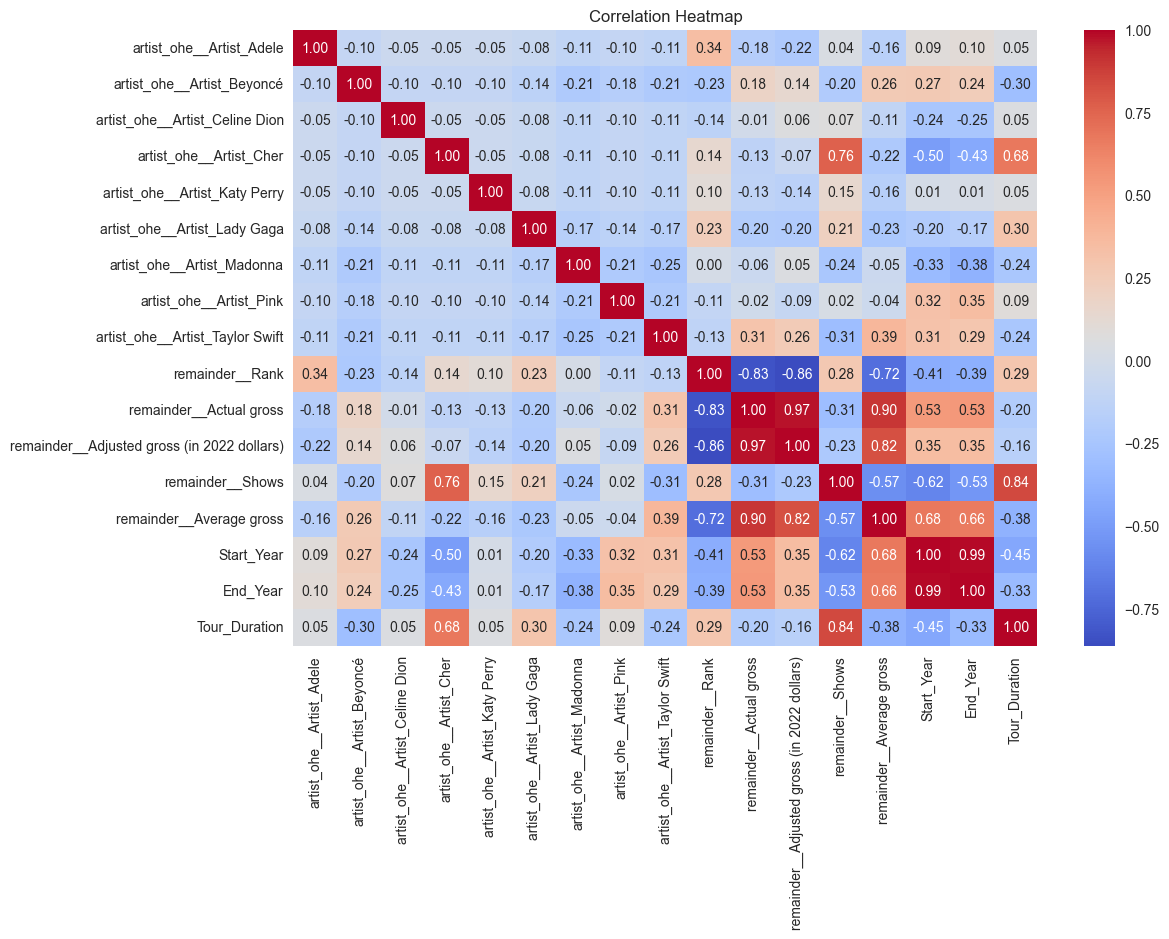

In [59]:
correlation_df=df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(
    correlation_df,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
#use  scatter plot or correlation heatmap for this
plt.title("Correlation Heatmap")
plt.show()

### Completed